## Problem 1
### Visualizing a Randomly Generated Dataset  

In this problem, we generate a dataset using a **Beta distribution**, ensuring it meets the requirement of at least **300 randomly drawn points**. The goal is to **analyze and visualize** the dataset effectively



### Import Required Libraries
We first import the necessary libraries for generating random data, performing statistical calculations, and visualizing the results.


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import beta

### Configure Plot Settings
To ensure our visualizations are clear and readable, we configure some global plot settings. This will make our figures more professional and easier to interpret.


In [73]:
def configure_plot():
    """
    Configure global matplotlib settings
    """
    plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'figure.dpi': 300
    })
    sns.set_theme(style="whitegrid", context="notebook", font_scale=1.2)


### Generate Random Data
We use the Beta distribution to generate **500 random values** between 0 and 100. The Beta distribution is chosen because it allows us to model skewed data, which is useful in various real-world applications.


In [52]:
def generate_beta_data(a=2, b=5, size=500, scale=100, seed=42):
    """
    Generate beta-distributed data and scale it.

    Parameters:
        a (float): Alpha parameter for the Beta distribution.
        b (float): Beta parameter for the Beta distribution.
        size (int): Number of data points.
        scale (float): Factor to scale the data.
        seed (int): Random seed for reproducibility.

    Returns:
        np.ndarray: Array of scaled beta-distributed data.
    """
    np.random.seed(seed)
    data = np.random.beta(a, b, size) * scale
    return data


### Compute Mean, Median, KDE, Standard Deviation, Kurtosis, and Skewness

We calculate the **mean** and **median** of our generated data to summarize its central tendency. Additionally, we compute a **Kernel Density Estimate (KDE)** to visualize a smooth approximation of the data distribution. To further understand the data’s variability and shape, we also determine the **standard deviation** (which measures the spread), **kurtosis** (which indicates the "peakedness" or tail heaviness), and **skewness** (which describes the asymmetry of the distribution).


In [74]:
def compute_statistics(data):
    """
    Compute basic statistics and a Gaussian kernel density estimate.

    Parameters:
        data (np.ndarray): Input data array.

    Returns:
        tuple: Mean, median, KDE, STD, kurtosis, skewness object for the data.
    """
    mean_val = np.mean(data)
    median_val = np.median(data)
    kde = stats.gaussian_kde(data)
    std = np.std(data)
    kurtosis = stats.kurtosis(data)
    skewness = stats.skew(data)

    return mean_val, median_val, kde, std, kurtosis, skewness


### Visualizing the Data with a Theoretical Curve

In this step, we create a **histogram** to represent the frequency distribution of our generated data.  

#### **Key Enhancements in This Plot:**
1. **Kernel Density Estimate (KDE)**:  
   - A smooth curve that estimates the probability distribution of the data.  
   - Helps visualize how the data is distributed beyond the histogram bins.  

2. **Theoretical Beta Distribution Overlay**:  
   - The actual **Beta probability density function (PDF)** is plotted using the same parameters (`α = 2`, `β = 5`).  
   - This allows us to compare our sampled data with the theoretical distribution.  

3. **Statistical Indicators (Mean & Median)**:  
   - The **mean (dashed line, orange)** and **median (dotted line, blue)** are marked to highlight central tendencies.  

4. **Annotated Summary Box**:  
   - Displays the key distribution parameters (`α`, `β`, and sample size `n`).  

This visualization helps in understanding **how closely the sampled data follows the theoretical Beta distribution** and ensures clarity in analysis.  


In [75]:
def plot_with_theoretical_curve(data, mean_val, median_val, kde, a=2, b=5, size=500, scale=100):
    """
    Creates a histogram with KDE overlay and a theoretical Beta distribution curve.

    Parameters:
        data (np.ndarray): Dataset.
        mean_val (float): Mean of the dataset.
        median_val (float): Median of the dataset.
        kde (scipy.stats.gaussian_kde): KDE function.
        a (float): Alpha parameter of the Beta distribution.
        b (float): Beta parameter of the Beta distribution.
        size (int): Number of samples.
        scale (float): Scaling factor.
    """
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Histogram with KDE overlay
    sns.histplot(data, bins=25, stat="density", color='#2c7bb6',
                 edgecolor='black', linewidth=1.2, alpha=0.6, 
                 label='Sampled Frequency', ax=ax)
    
    x_range = np.linspace(0, scale, 500)
    ax.plot(x_range, kde(x_range), color='#d7191c', linewidth=2.5, label='KDE Estimate')
    
    # Theoretical Beta distribution
    theoretical_pdf = beta.pdf(x_range / scale, a, b) / scale
    ax.plot(x_range, theoretical_pdf, color='green', linestyle=':', linewidth=2.5, label='Theoretical Beta')
    
    # Statistical markers
    ax.axvline(mean_val, color='#fdae61', linestyle='--', linewidth=2, label=f'Mean ({mean_val:.1f})')
    ax.axvline(median_val, color='#abd9e9', linestyle='-.', linewidth=2, label=f'Median ({median_val:.1f})')

    # Annotation Box
    stats_text = f'Distribution Parameters:\nα = {a:.1f}\nβ = {b:.1f}\nn = {size}'
    ax.text(0.72, 0.75, stats_text, transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'), fontsize=12)
    
    # Aesthetics
    ax.set_xlabel('Value Range (0-100)', fontweight='bold')
    ax.set_ylabel('Density', fontweight='bold')
    ax.set_title('Histogram of Randomly Generated Data', pad=20, fontweight='bold')
    ax.legend(frameon=True, framealpha=0.9, loc='upper left', facecolor='#f7f7f7', fontsize=10)
    ax.set_xlim(0, scale)
    ax.set_ylim(0, 0.035)
    
    plt.tight_layout()
    plt.show()


In [76]:
def main():
    """
    Main function to generate the dataset, compute statistics, and plot the distribution.
    """
    # Setting plot configuration.
    configure_plot()
    
    # Parameters for the beta distribution.
    a, b = 2, 5
    size, scale = 500, 100
    
    # Generate the dataset.
    data = generate_beta_data(a=a, b=b, size=size, scale=scale)
    
    # Compute statistics and create KDE.
    mean_val, median_val, kde, std, kurtosis, skewness = compute_statistics(data)
    # Print mean and median
    print(f"Mean: {mean_val:.2f}")
    print(f"Median: {median_val:.2f}")
    print(f"Standard Deviation: {std:.2f}")
    print(f"Kurtosis: {kurtosis:.2f}")
    print(f"Skewness: {skewness:.2f}")
    
    # Plot the distribution along with annotations.
    plot_with_theoretical_curve(data, mean_val, median_val, kde, a=a, b=b, size=size, scale=scale)


Mean: 28.70
Median: 26.66
Standard Deviation: 15.25
Kurtosis: -0.41
Skewness: 0.48


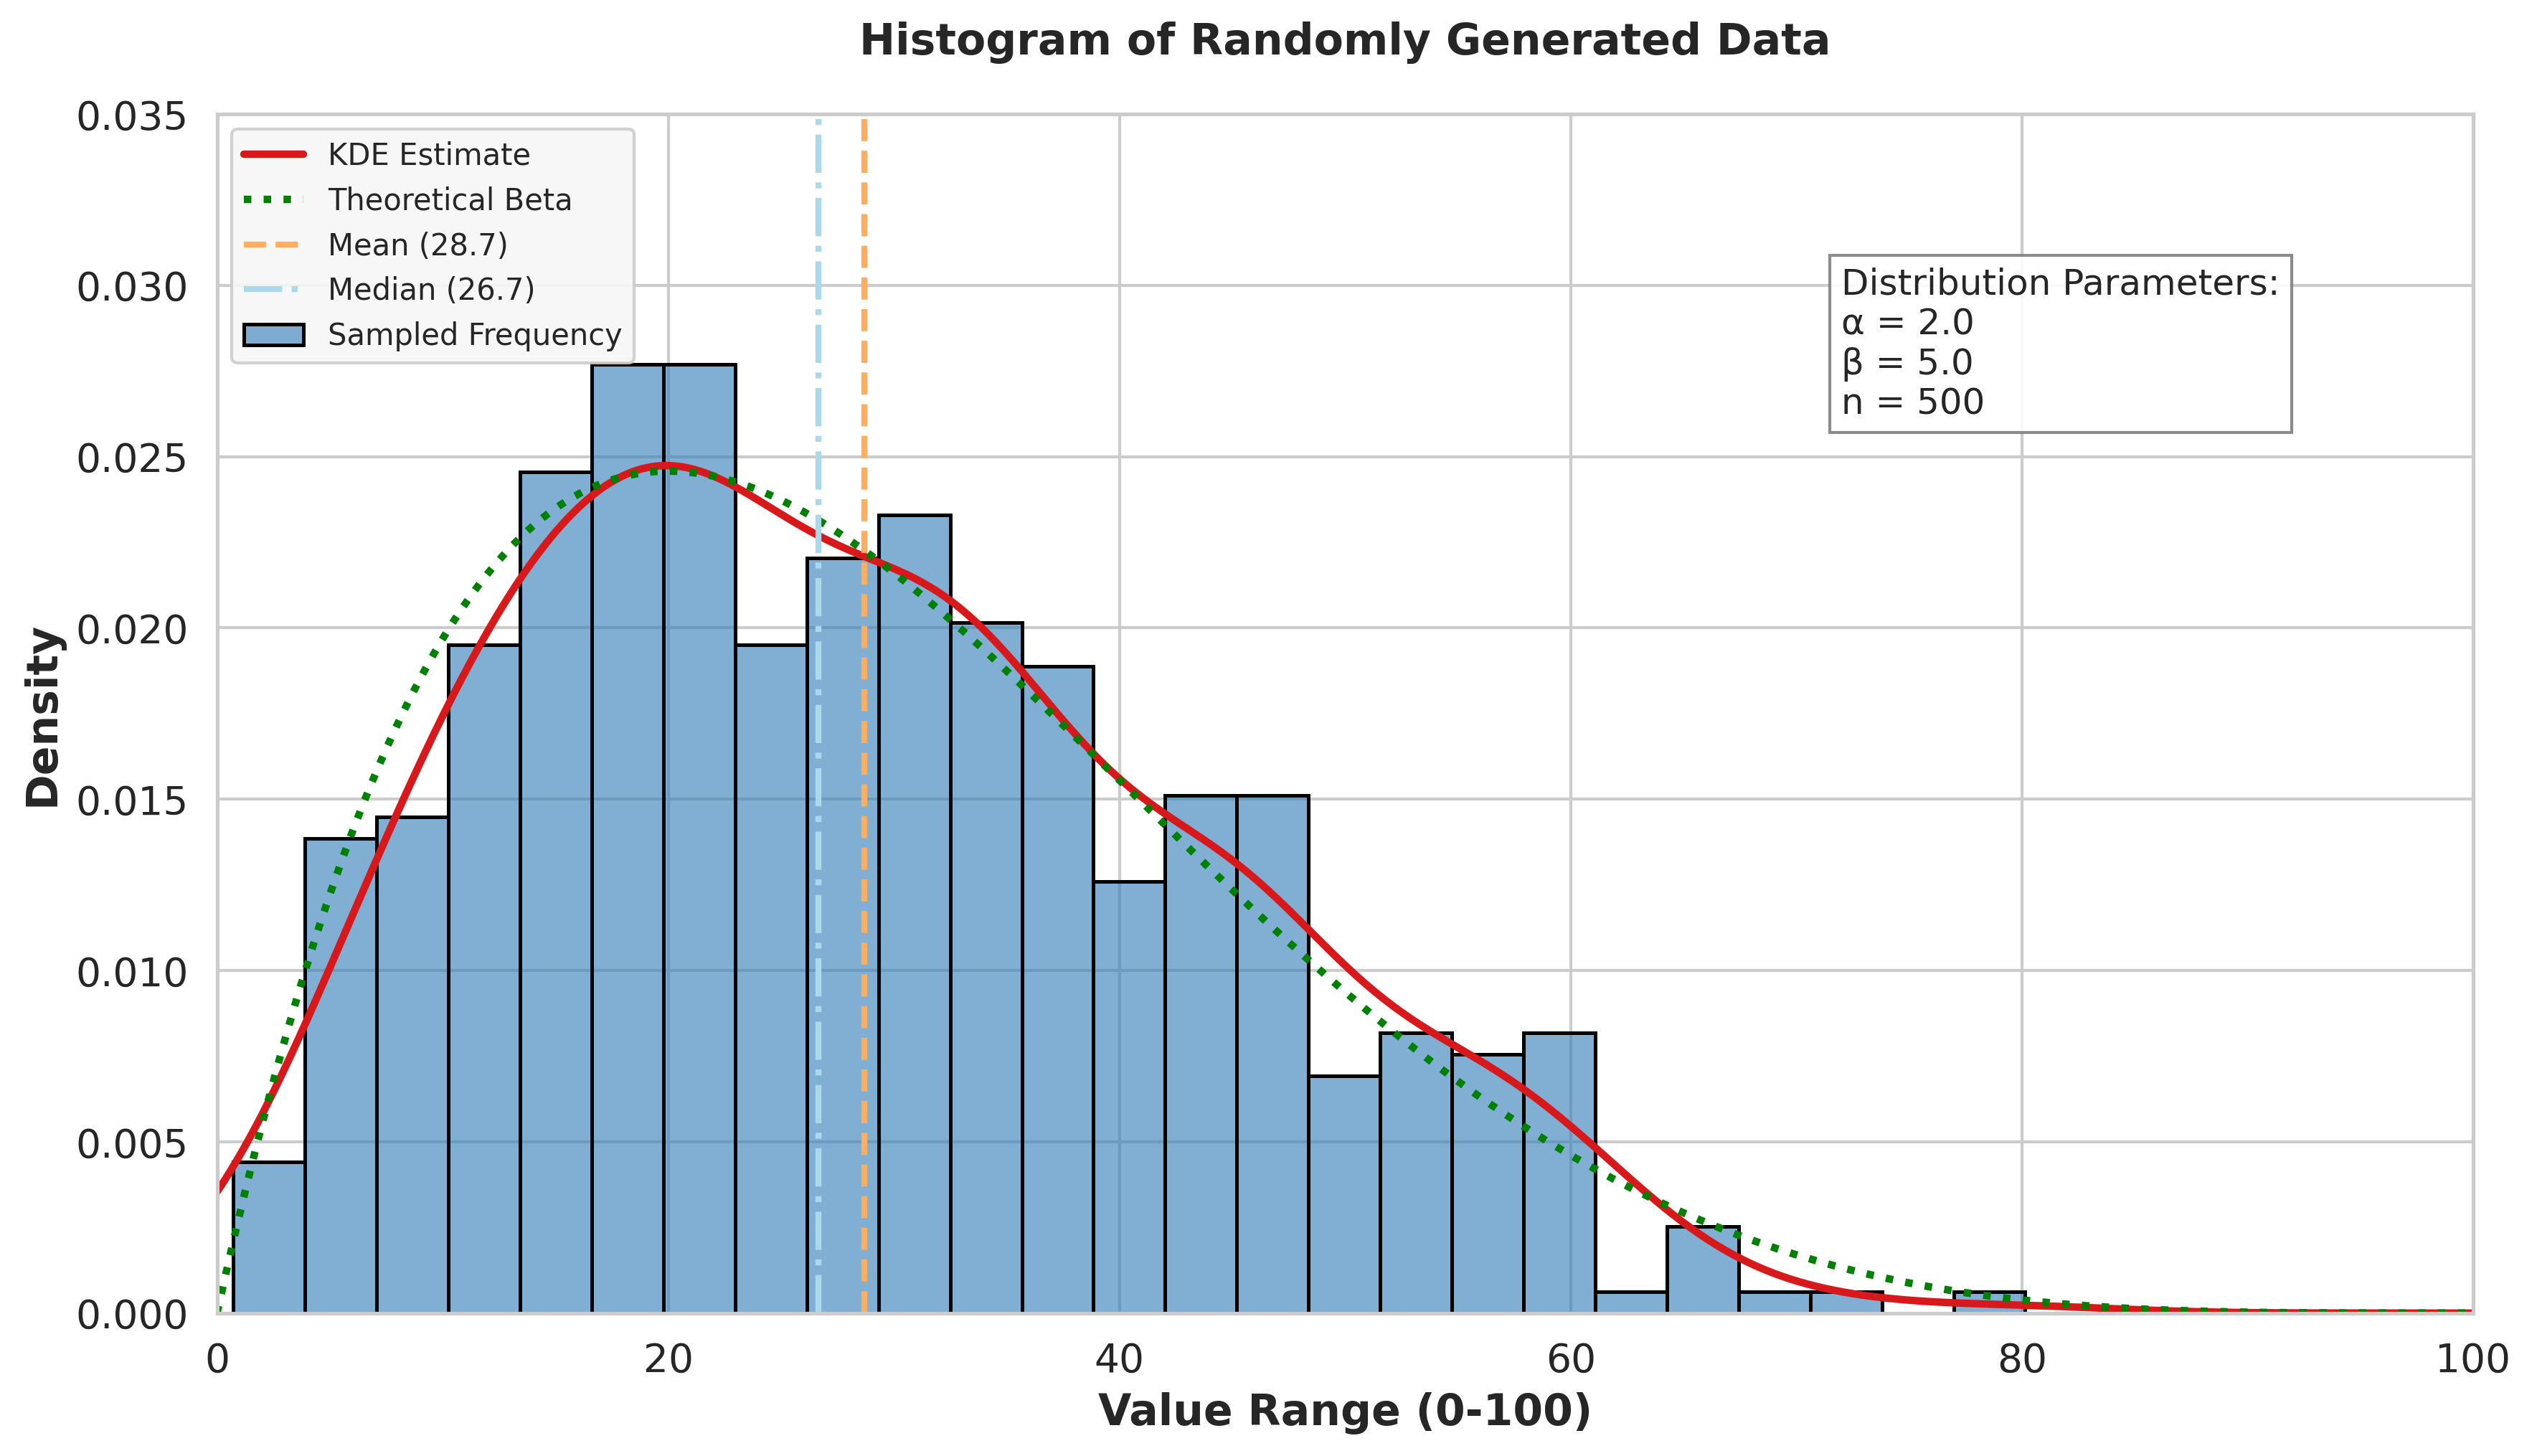

In [77]:
main()

## Problem 2
### Exploratory Data Analysis (EDA) on the Given Dataset

In this problem, we are exploring a dataset that includes multiple columns (`var1`, `var2`, `var3`) and a (`class`). The goal is to explore the data thoroughly using multiple visualizations to uncover patterns, distributions, and relationships between variables.

Let's start by loading the data and inspecting its structure.


In [78]:
url = "https://star.herts.ac.uk/~kuhn/DHV/exercises_problem2.parquet"

In [79]:
def load_data(url: str):
    """Loads dataset from the specified URL (parquet file)"""
    return pd.read_parquet(url)


In [80]:
def describe_data(df: pd.DataFrame):
    """Generates descriptive statistics for the given dataframe"""
    return df.describe()

In [81]:
# Load the dataset from the provided parquet file
df = load_data(url)

# Display the first few rows of the dataframe to inspect the data
print(df.head(), '\n')

# Show descriptive statistics
describe_data(df)

       var1      var2      var3  class
0  2.220386  3.088938  5.309324      1
1 -1.112359  1.838144  0.725785      0
2 -0.687695  1.747231  1.059535      0
3 -2.875016  1.718303 -1.156714      0
4 -2.010930  1.327895 -0.683035      0 



,var1,var2,var3,class
count,400.000000,400.000000,400.000000,400.000000
mean,3.469246,2.576392,6.045638,0.627500
std,3.811159,0.533500,4.219296,0.484076
min,-5.577154,0.444386,-5.132768,0.000000
25%,0.068847,2.346191,2.419225,0.000000
50%,4.968903,2.708548,7.961119,1.000000
75%,7.025826,2.951366,9.840901,1.000000
max,9.425215,3.471373,12.048517,1.000000


### Univariate Distribution of Variables

We will start by exploring the distribution of each variable (`var1`, `var2`, `var3`). This will allow us to understand their individual behaviors, such as whether they are normally distributed or skewed. We'll create histograms and boxplots for each variable.


In [82]:
def plot_univariate_distribution(df: pd.DataFrame, columns: list, colors: list, bins: int = 20, kde: bool = True):
    """Generates histograms with KDE for specified columns in the dataframe."""
    fig, axes = plt.subplots(1, len(columns), figsize=(18, 6))
    
    for i, column in enumerate(columns):
        sns.histplot(df[column], kde=kde, ax=axes[i], bins=bins, color=colors[i])
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()



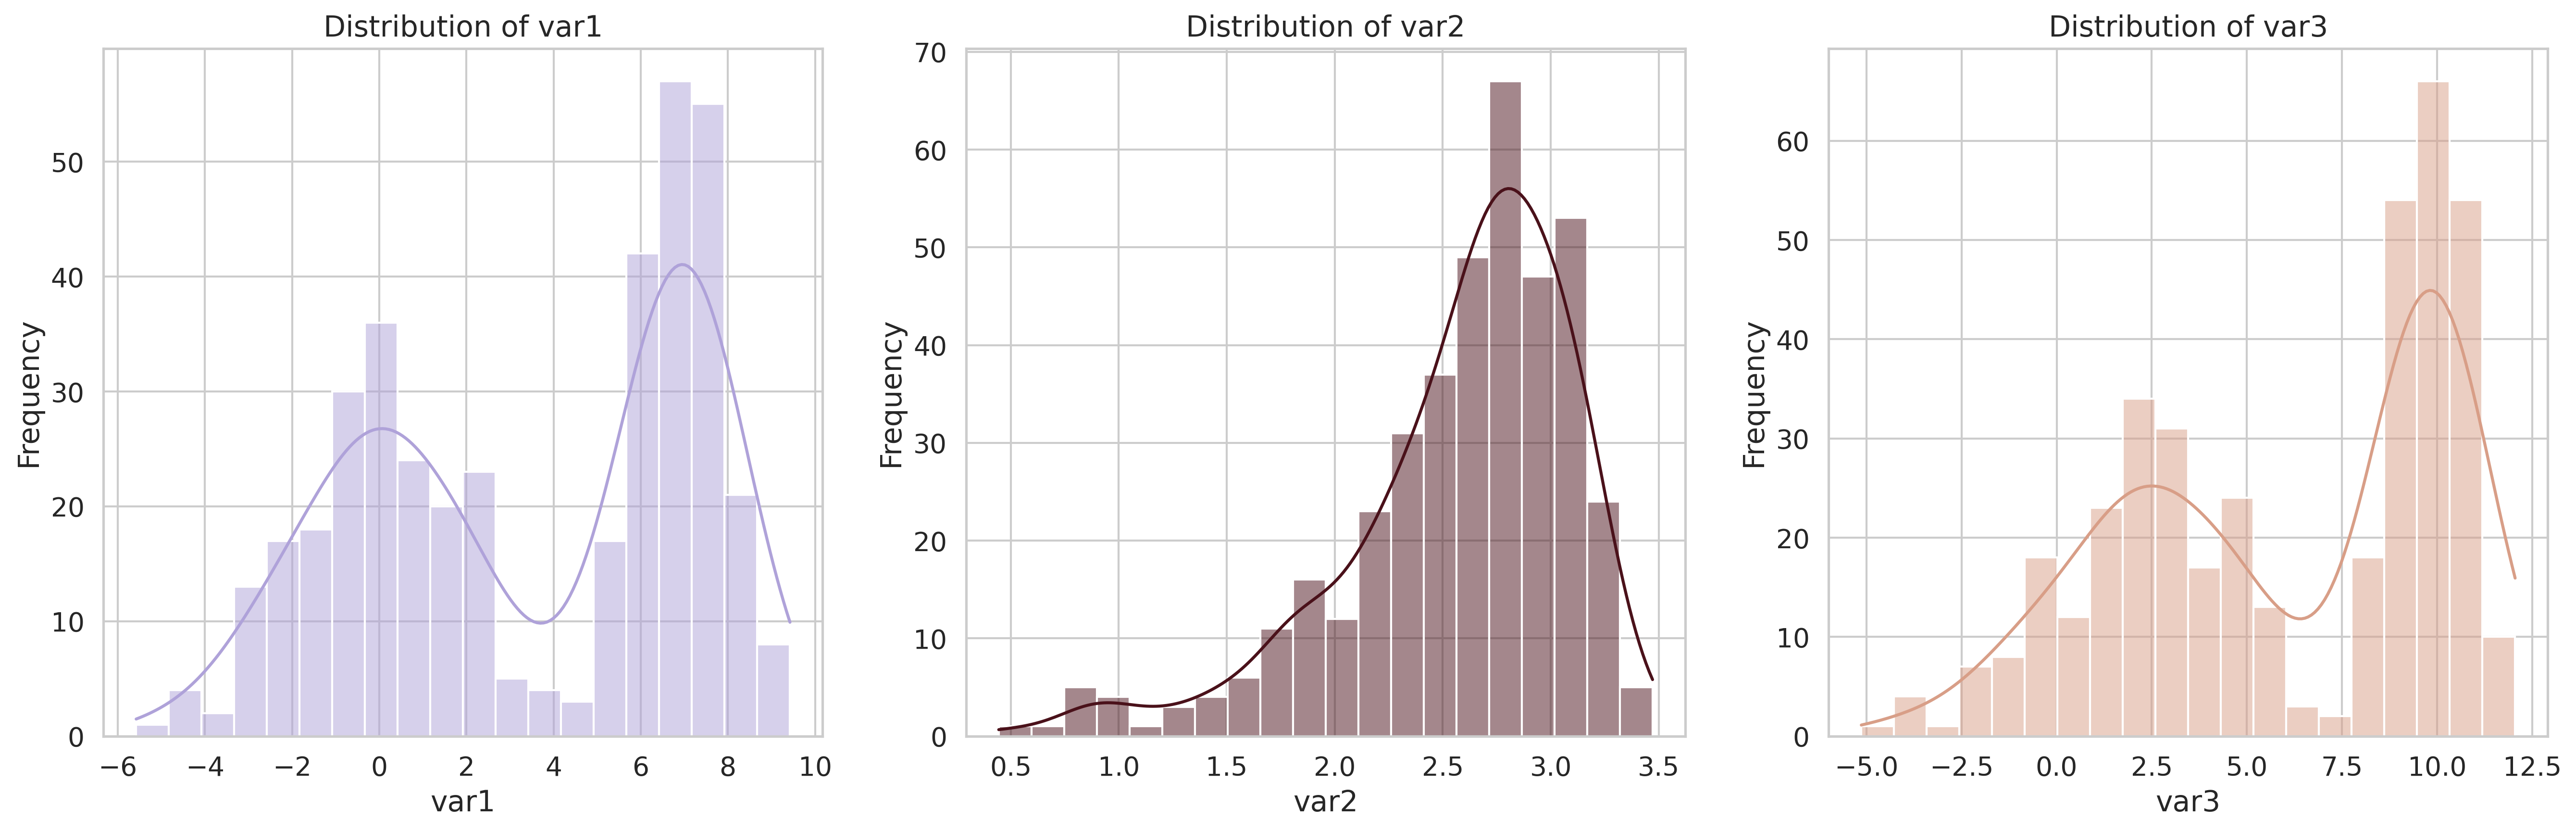

In [83]:
# List of variables to visualize
columns = ['var1', 'var2', 'var3']

# List of random colors
colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for _ in columns]

# Plot the distributions
plot_univariate_distribution(df, columns, colors)

### Bivariate Analysis

Next, we'll explore the relationships between pairs of variables. We will create scatter plots with regression lines to show potential correlations and interactions between the variables.


In [84]:
def plot_bivariate_relationship(df: pd.DataFrame, var1: str, var2: str):
    """Generates a scatter plot with a regression line for the relationship between two variables."""
    plt.figure(figsize=(8, 6))
    sns.regplot(x=var1, y=var2, data=df, scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
    plt.title(f'{var1} vs {var2}')
    plt.show()


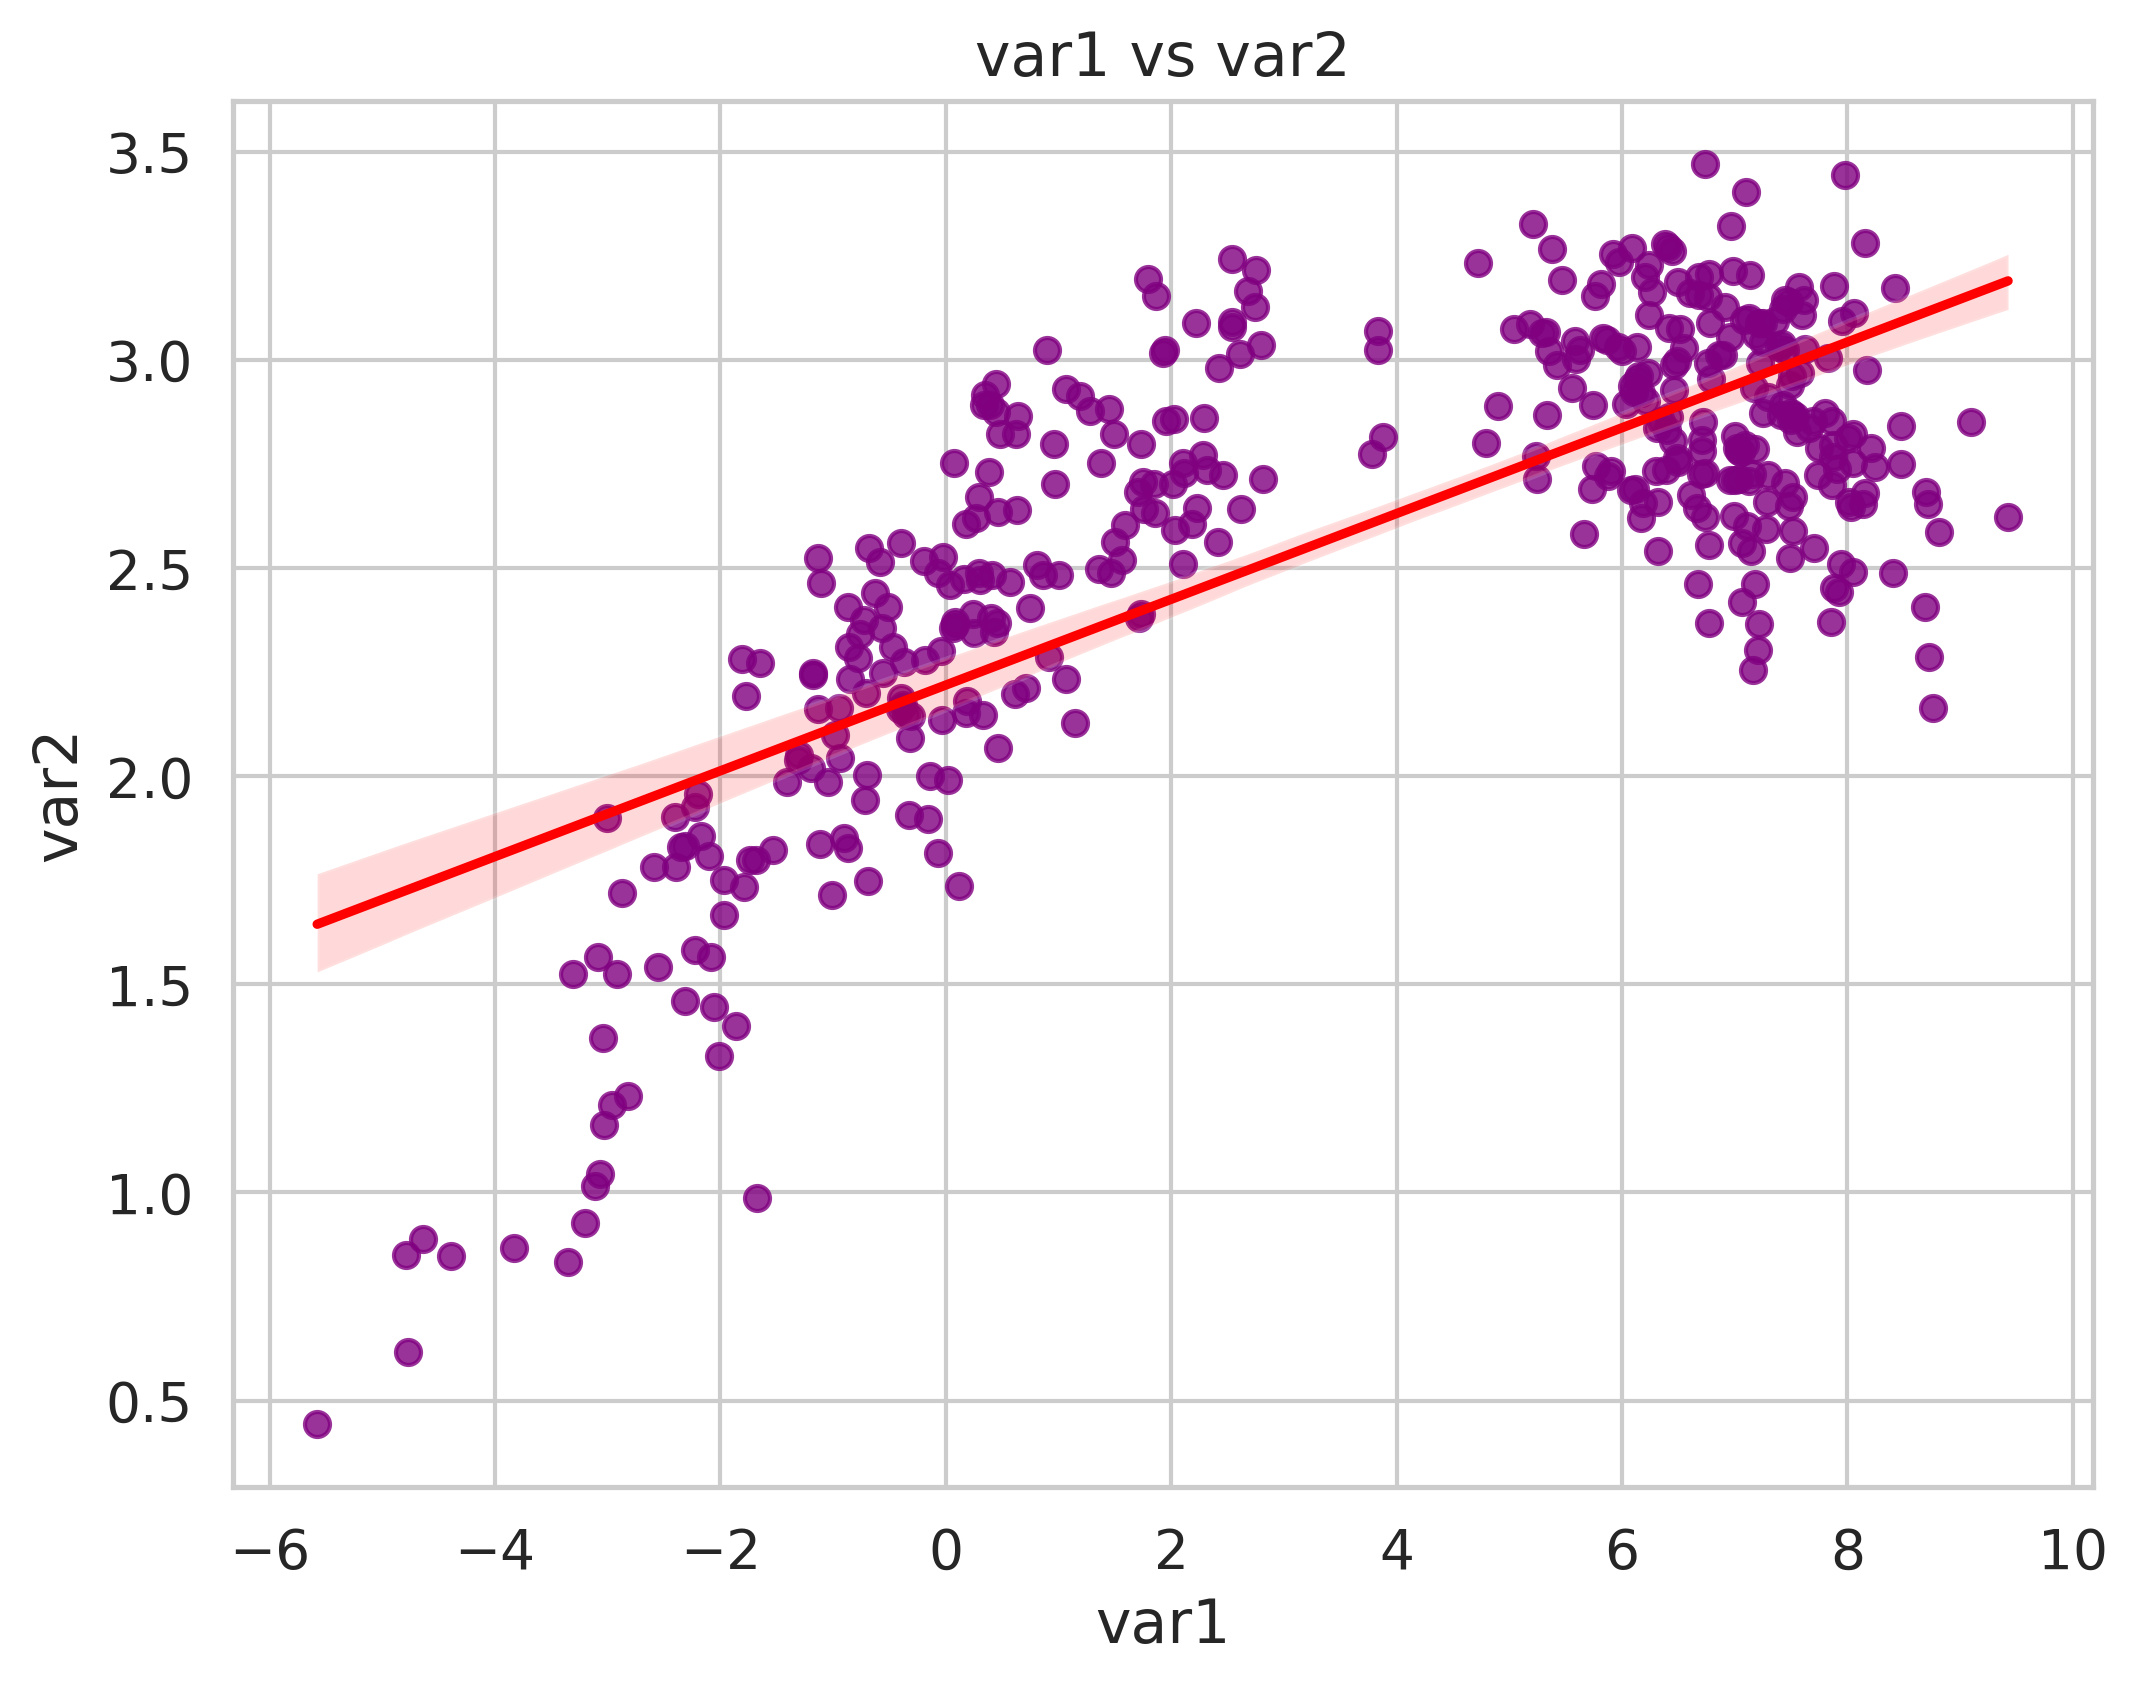

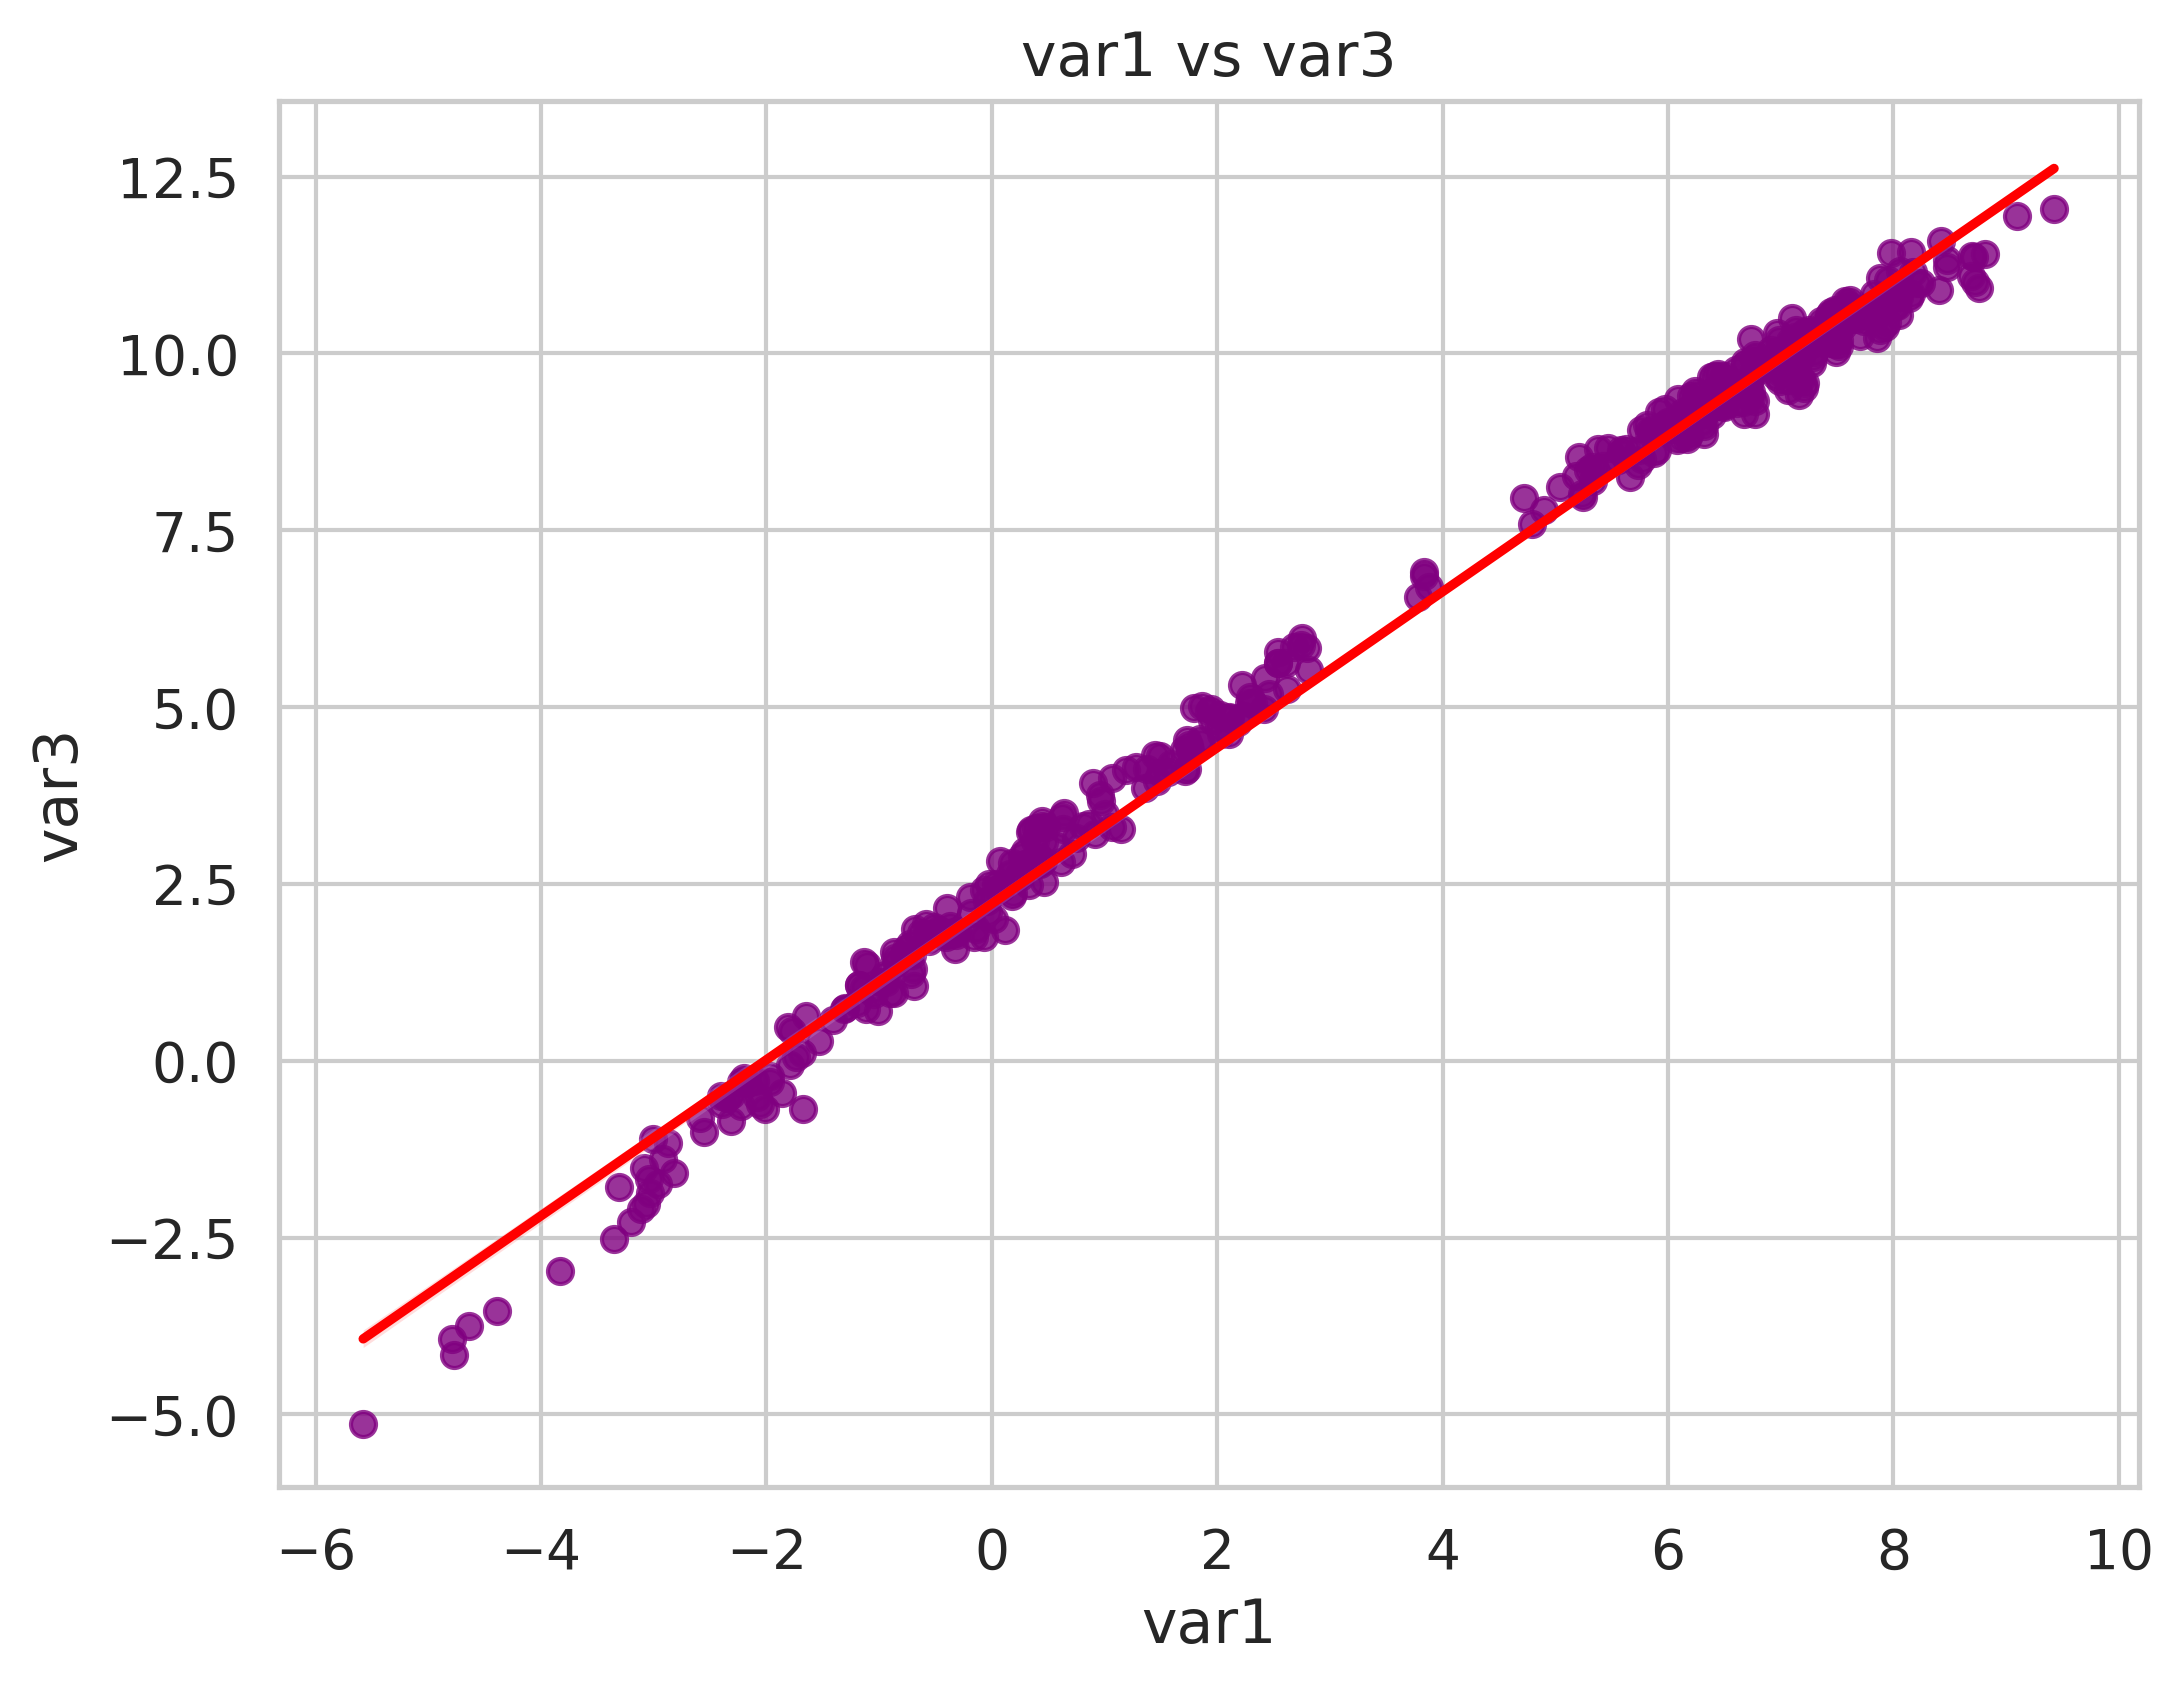

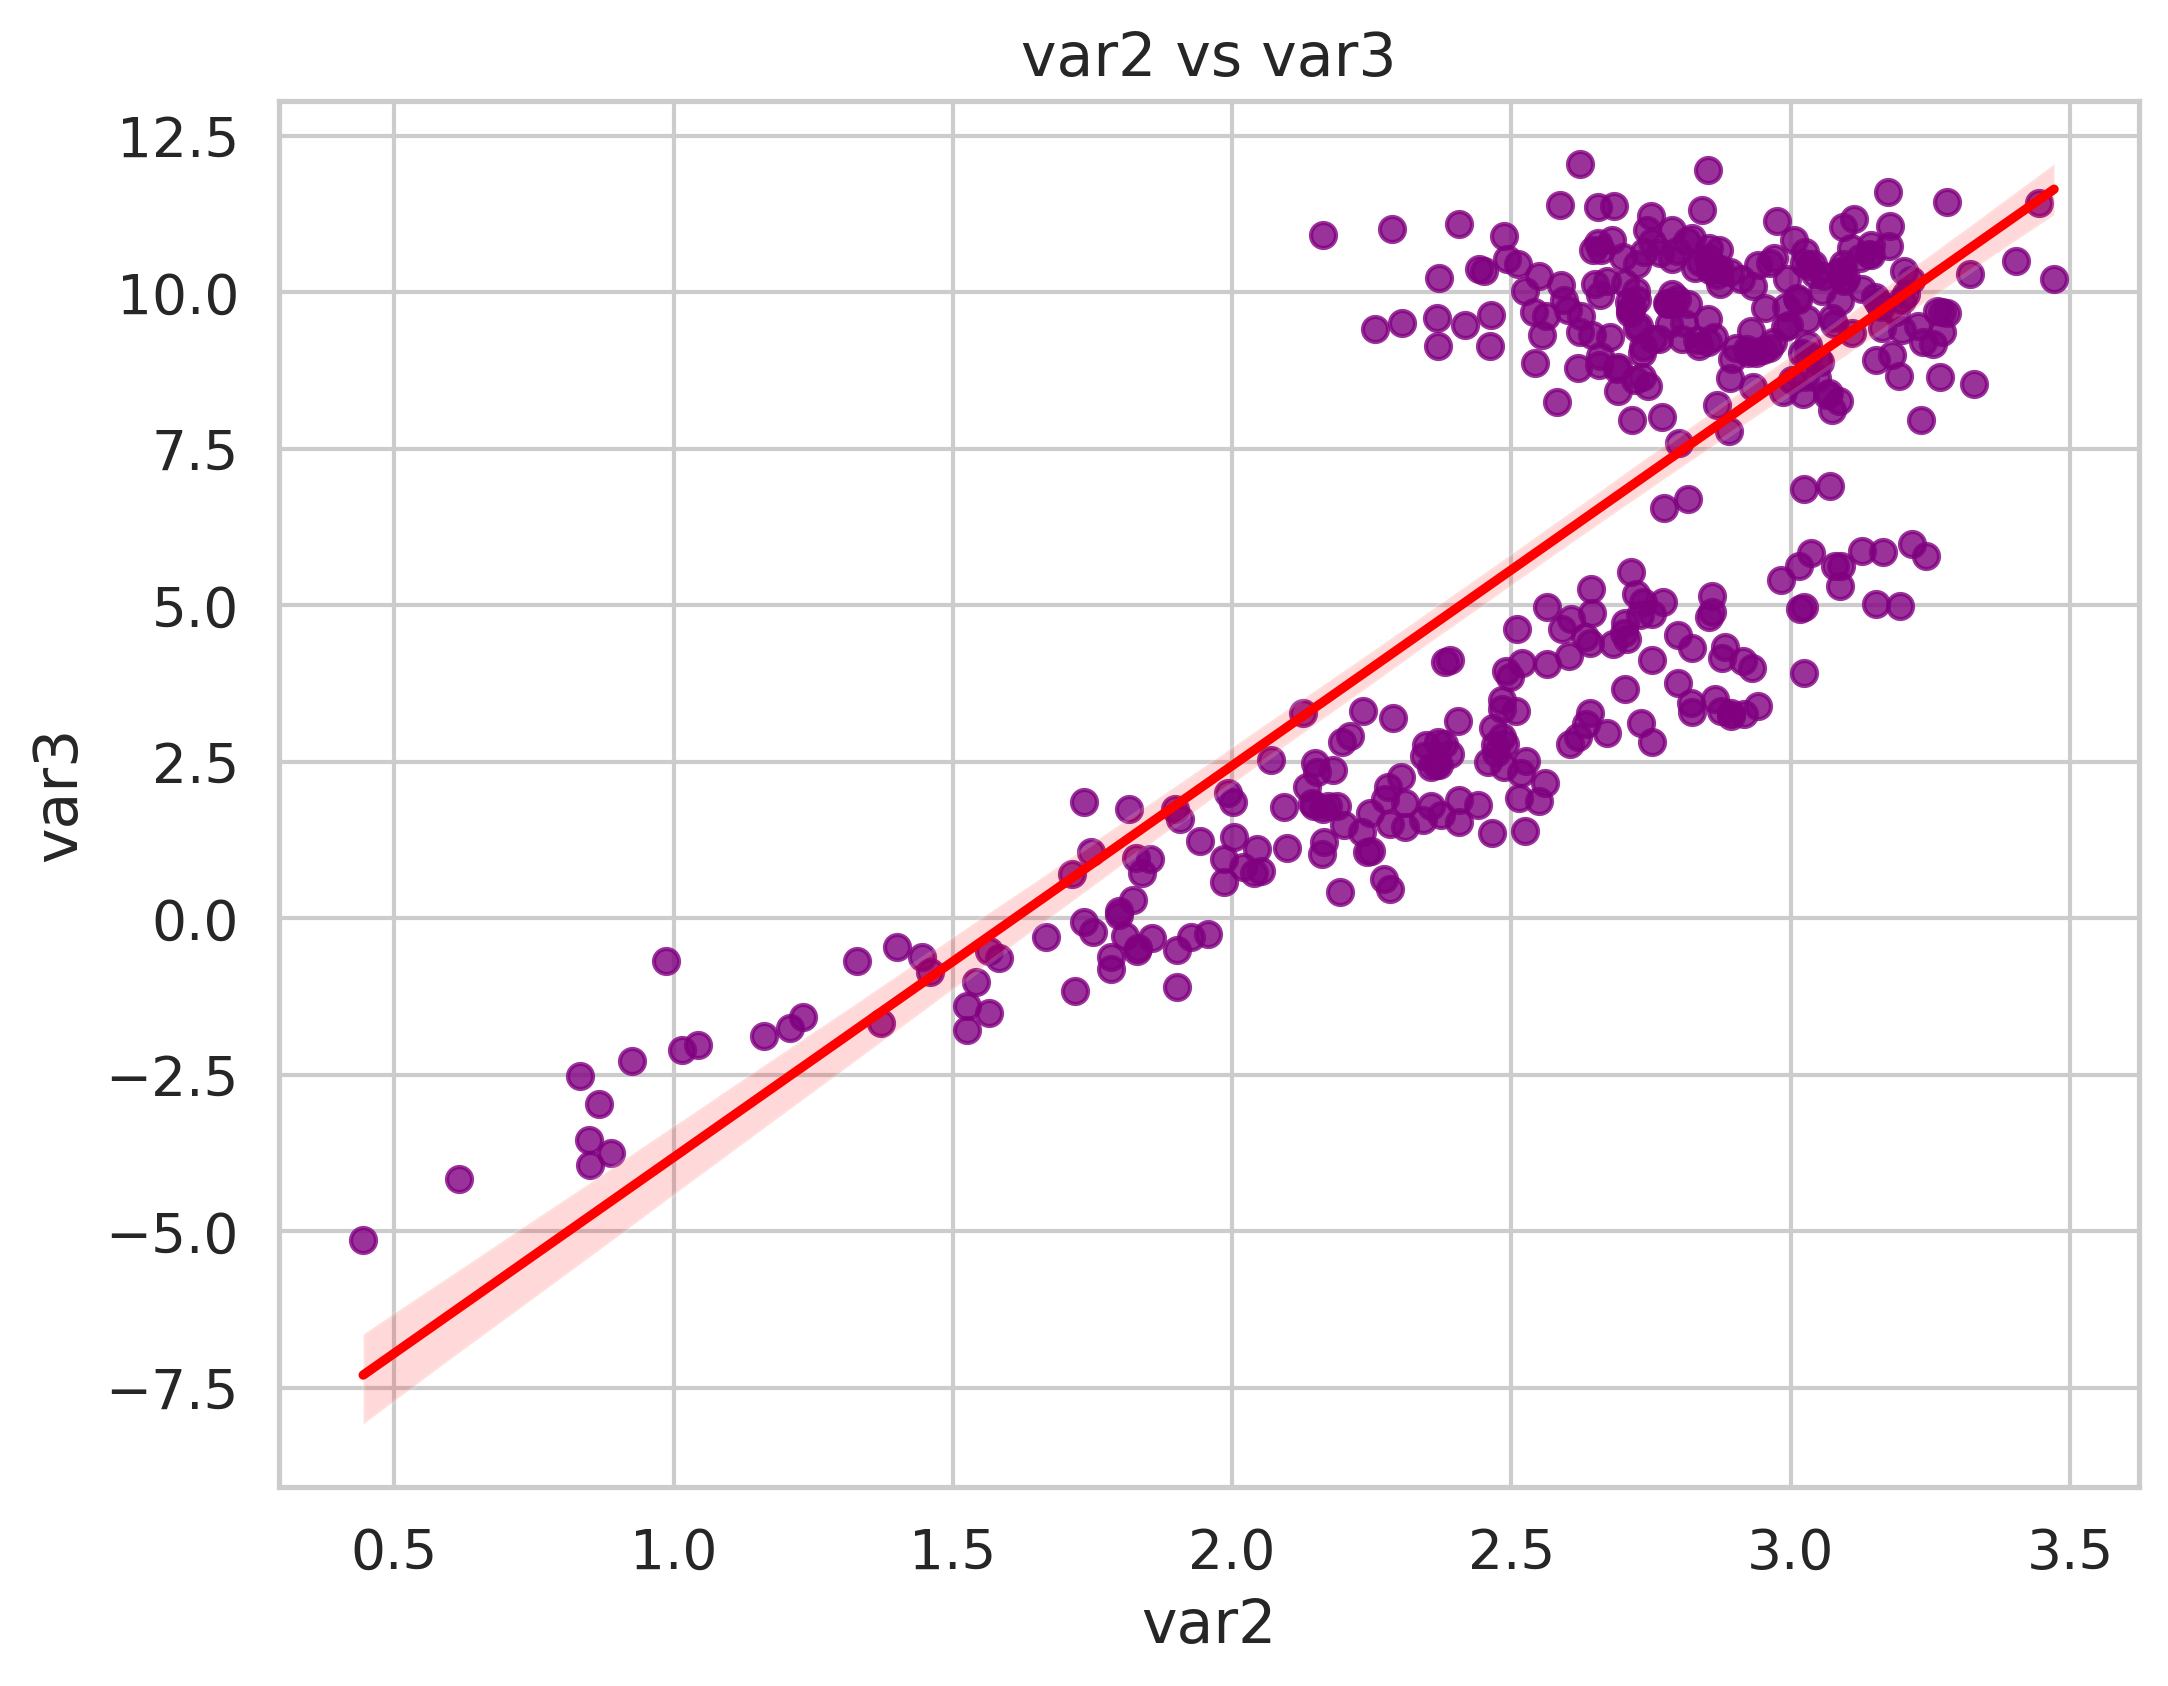

In [85]:
# Bivariate visualizations
plot_bivariate_relationship(df, 'var1', 'var2')
plot_bivariate_relationship(df, 'var1', 'var3')
plot_bivariate_relationship(df, 'var2', 'var3')

### Class Distribution

We now examine the distribution of the `class` variable, which will help us understand how the data is classified. We will create a count plot to show the distribution of classes.


In [86]:
def plot_class_distribution(df: pd.DataFrame, class_column: str):
    """Generates a count plot for the class distribution."""
    plt.figure(figsize=(6, 4))
    sns.countplot(x=class_column, data=df, palette='Set2')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()


/tmp/ipykernel_35512/2317389589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=class_column, data=df, palette='Set2')


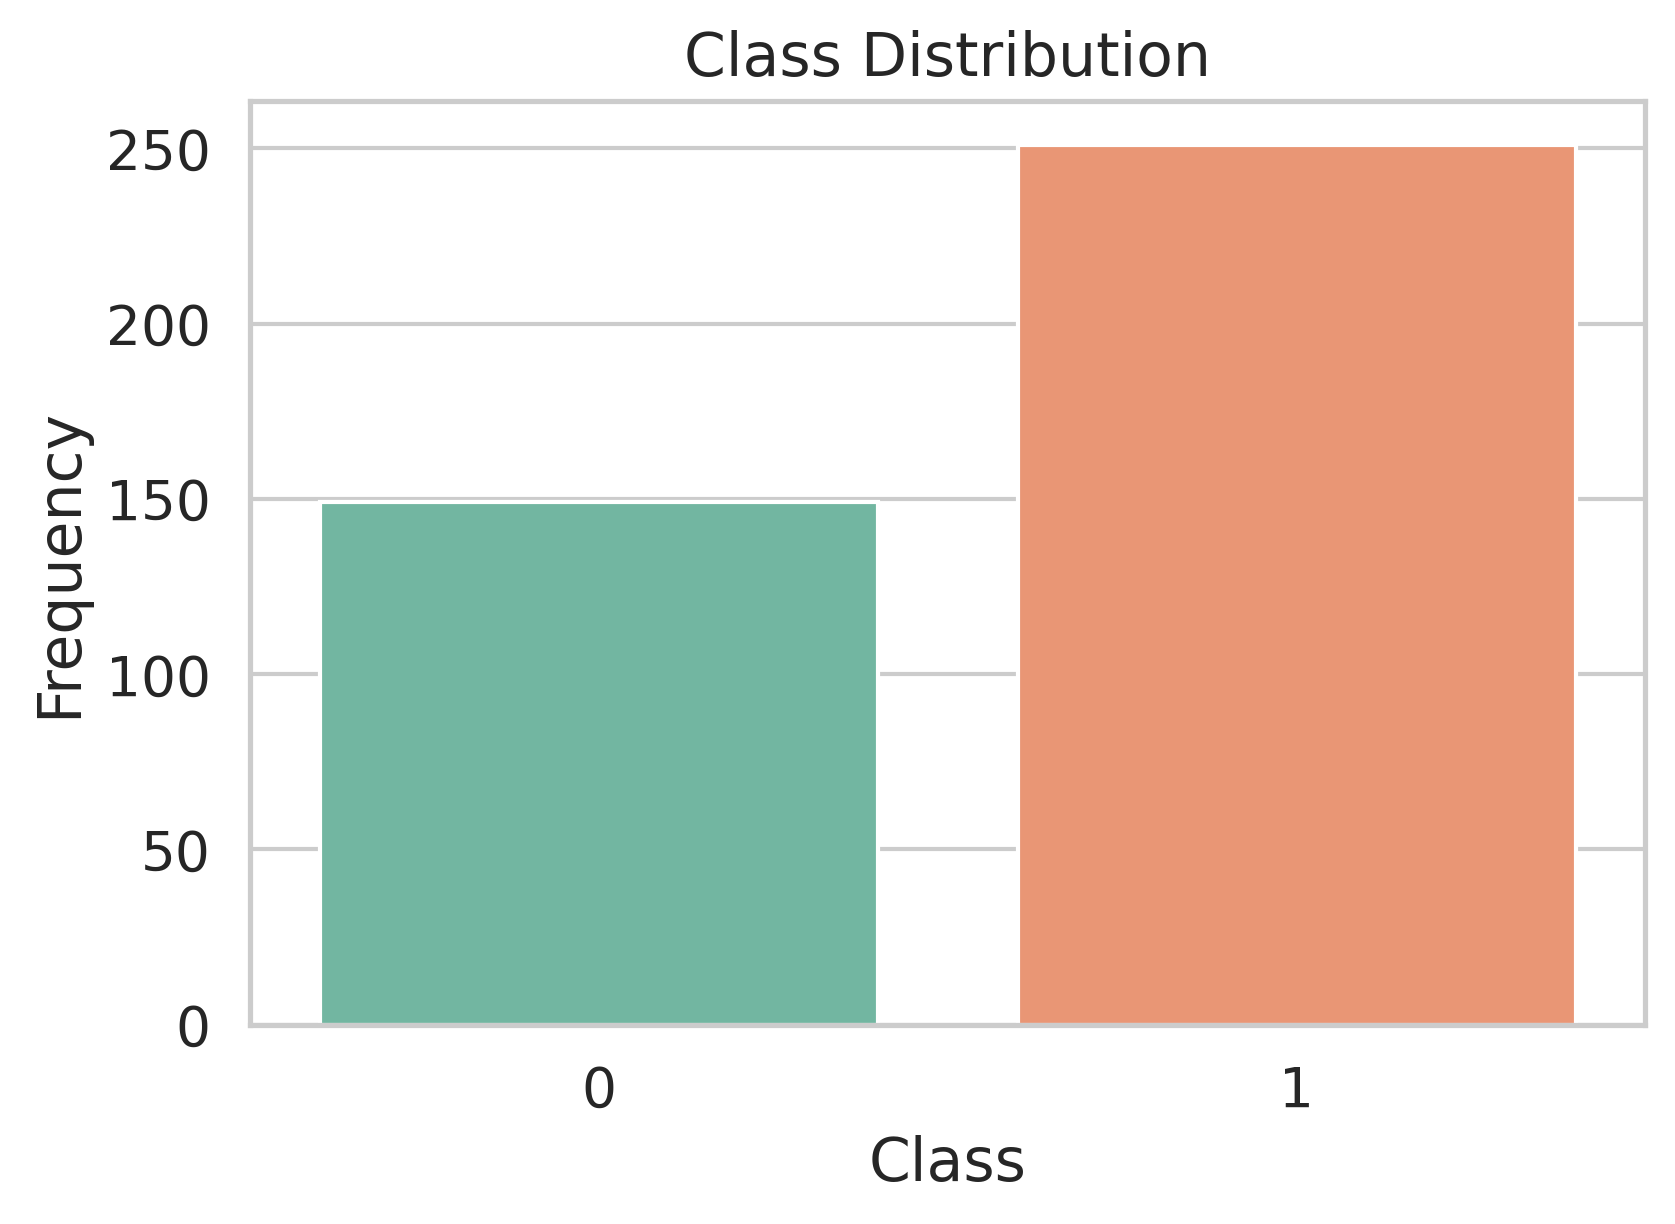

In [87]:
# Plot class distribution
plot_class_distribution(df, 'class')

### Analyzing Variables by Class

Next, we will visualize how the columns (`var1`, `var2`, `var3`) differ based on the class. We will create boxplots for each variable, grouped by class.


In [88]:
def plot_boxplots_by_class(df: pd.DataFrame, class_column: str, columns: list):
    """Generates boxplots for specified variables grouped by class."""
    fig, axes = plt.subplots(1, len(columns), figsize=(18, 6))
    
    for i, var in enumerate(columns):
        sns.boxplot(x=class_column, y=var, data=df, ax=axes[i], palette='Set2')
        axes[i].set_title(f'{var} by Class')
    
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_35512/2770536593.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=class_column, y=var, data=df, ax=axes[i], palette='Set2')
/tmp/ipykernel_35512/2770536593.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=class_column, y=var, data=df, ax=axes[i], palette='Set2')
/tmp/ipykernel_35512/2770536593.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=class_column, y=var, data=df, ax=axes[i], palette='Set2')


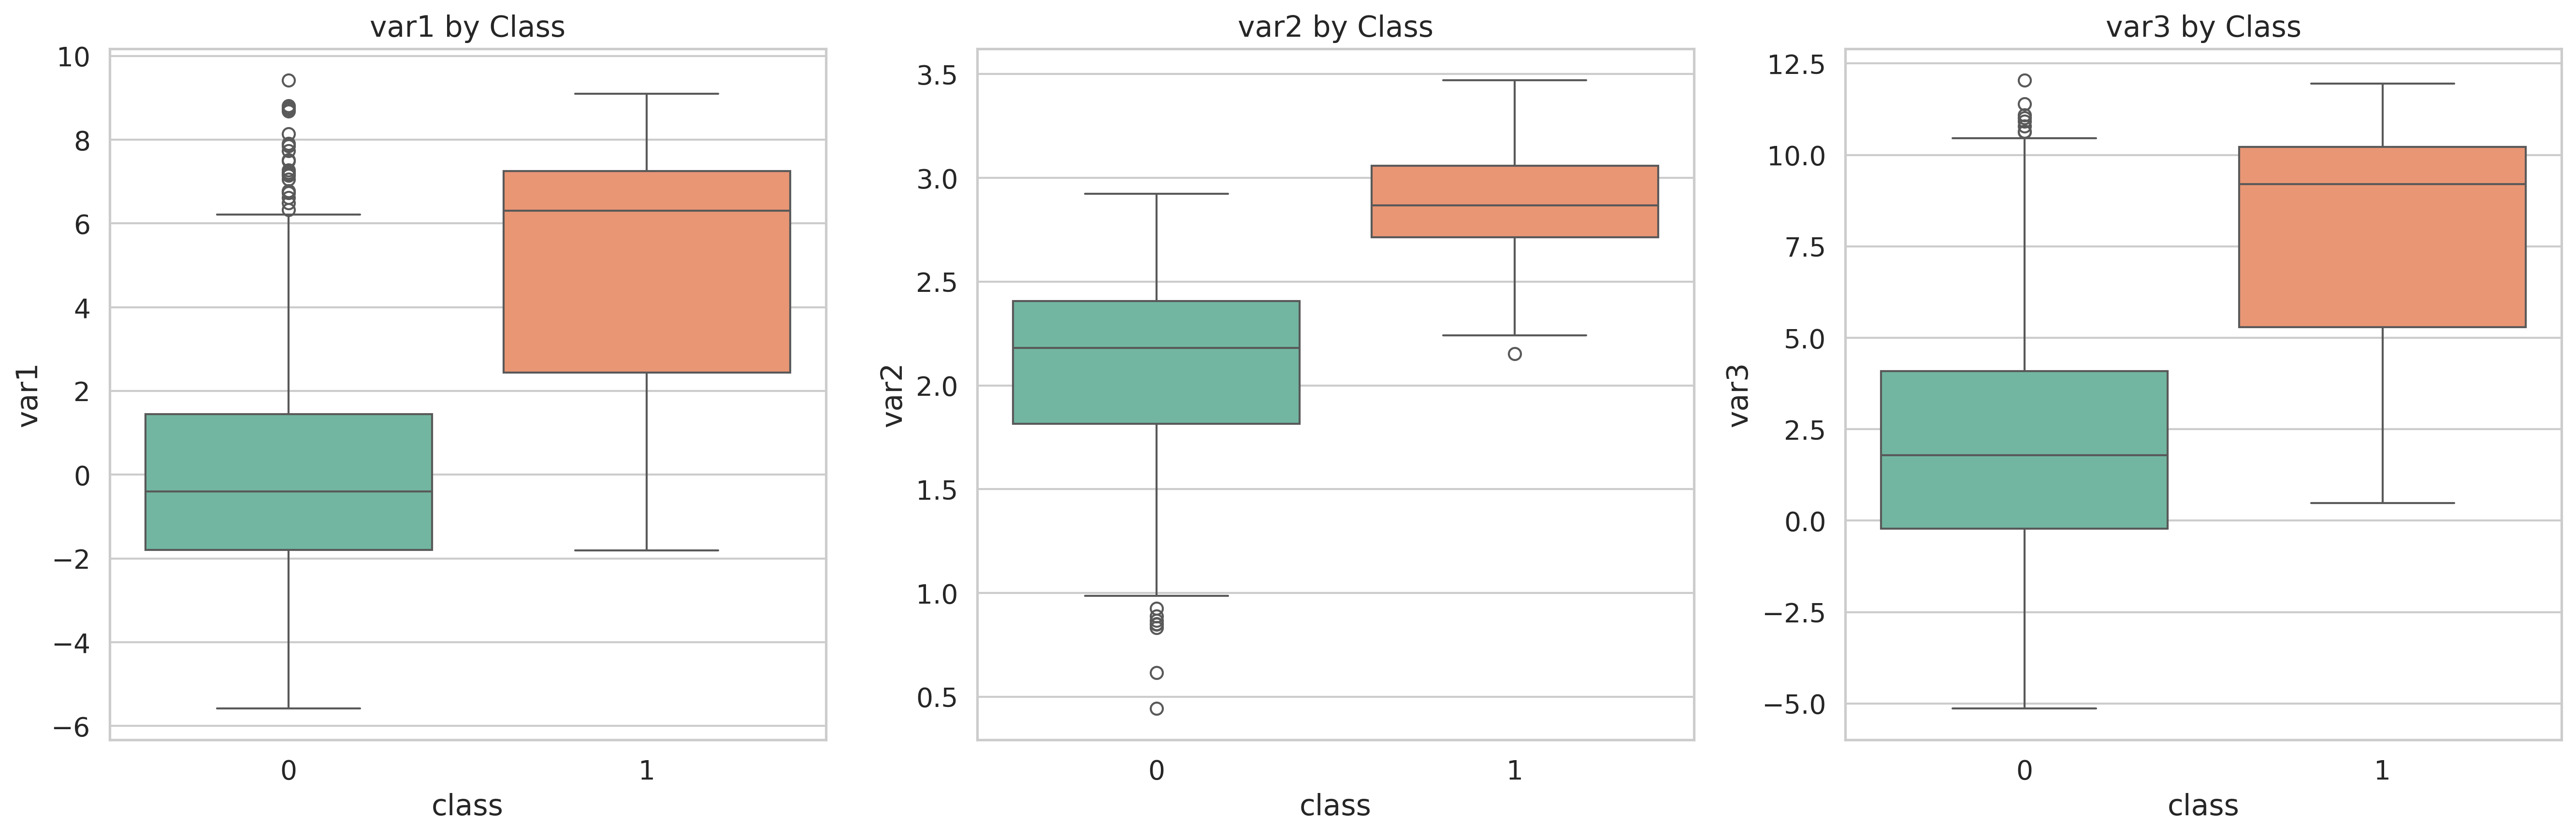

In [89]:
# Plot boxplots for variables by class
plot_boxplots_by_class(df, 'class', columns)

### Pairwise Relationships and Correlations

Now, we will explore the pairwise relationships between all variables, including the `class` variable. This will help us understand if any linear or non-linear relationships exist between the variables. We'll use a **pairplot** to visualize the distributions and relationships.


In [93]:
def plot_pairwise_relationships(df: pd.DataFrame, class_column: str):
    """Generates a pairplot to visualize pairwise relationships between variables."""
    sns.pairplot(df, hue=class_column, palette='Set2')
    plt.suptitle('Pairwise Relationships of Variables by Class', y=1.02, fontsize=16)
    plt.show()


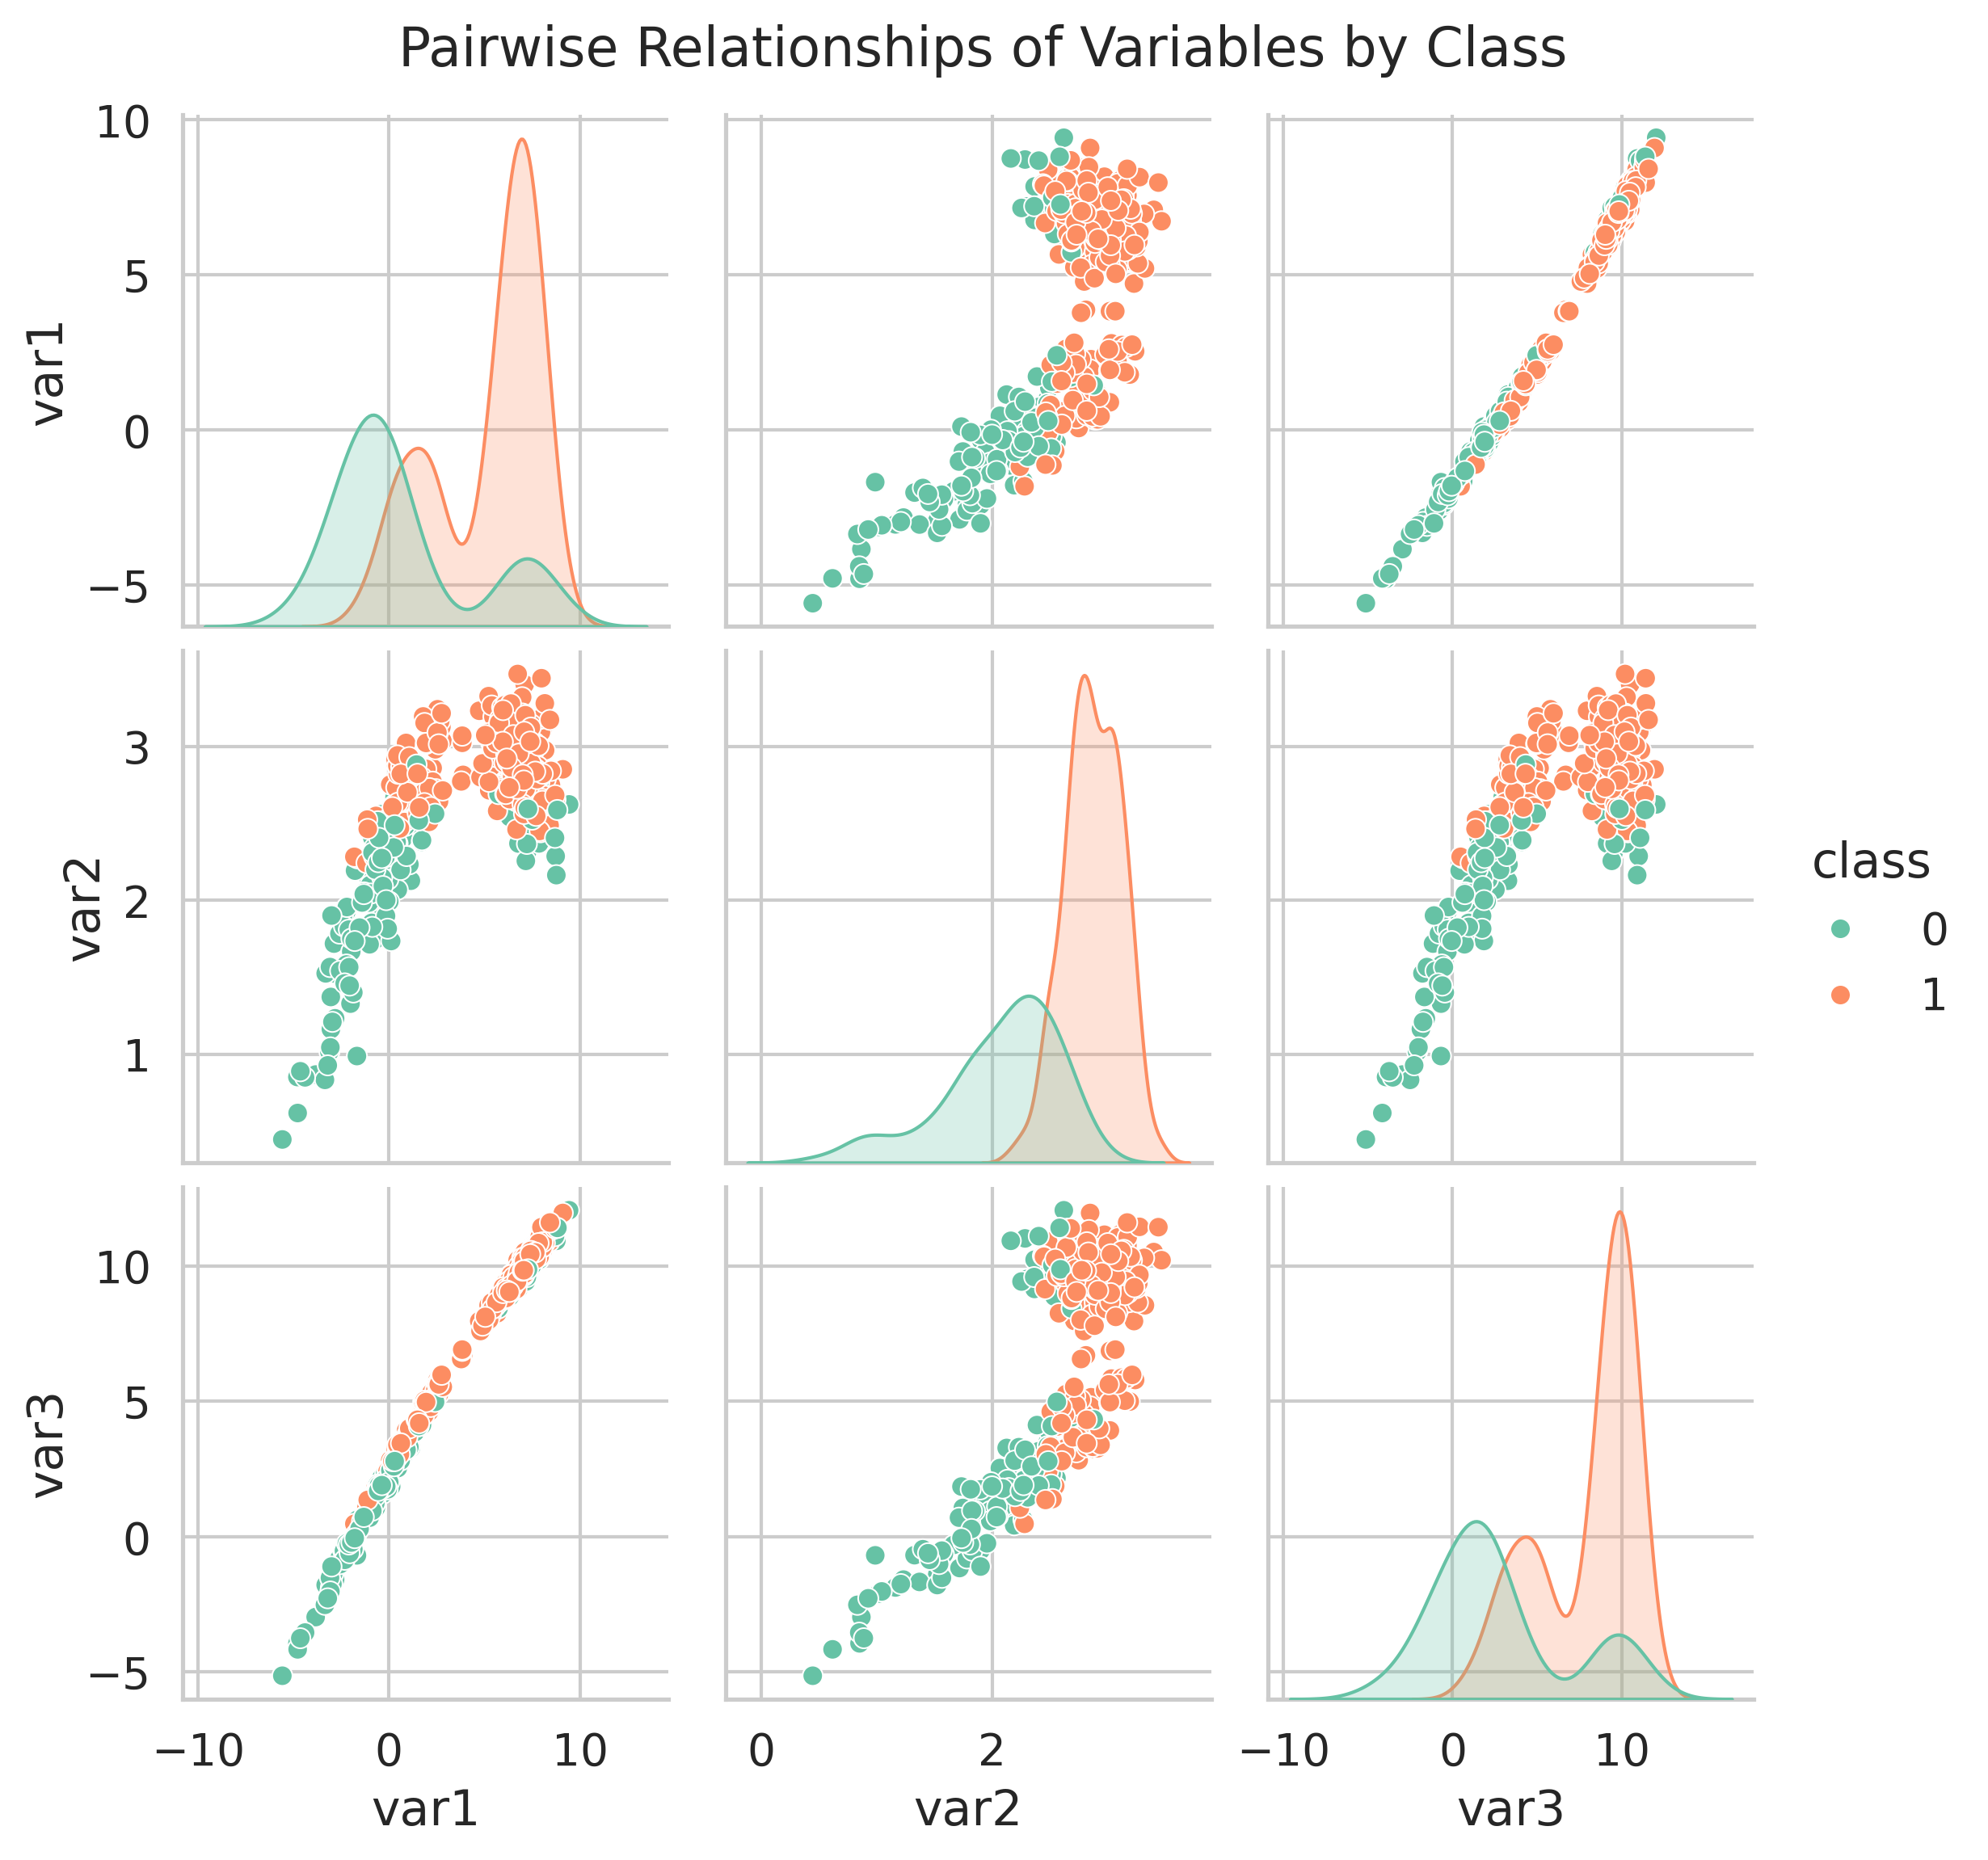

In [94]:
# Plot pairwise relationships
plot_pairwise_relationships(df, 'class')

### Correlation Heatmap

To complement our pairplot, we generate a correlation heatmap. This heatmap shows the correlation coefficients between all numeric variables in the dataset, providing a clear numerical summary of linear relationships. It can help us identify which variables are most strongly associated.


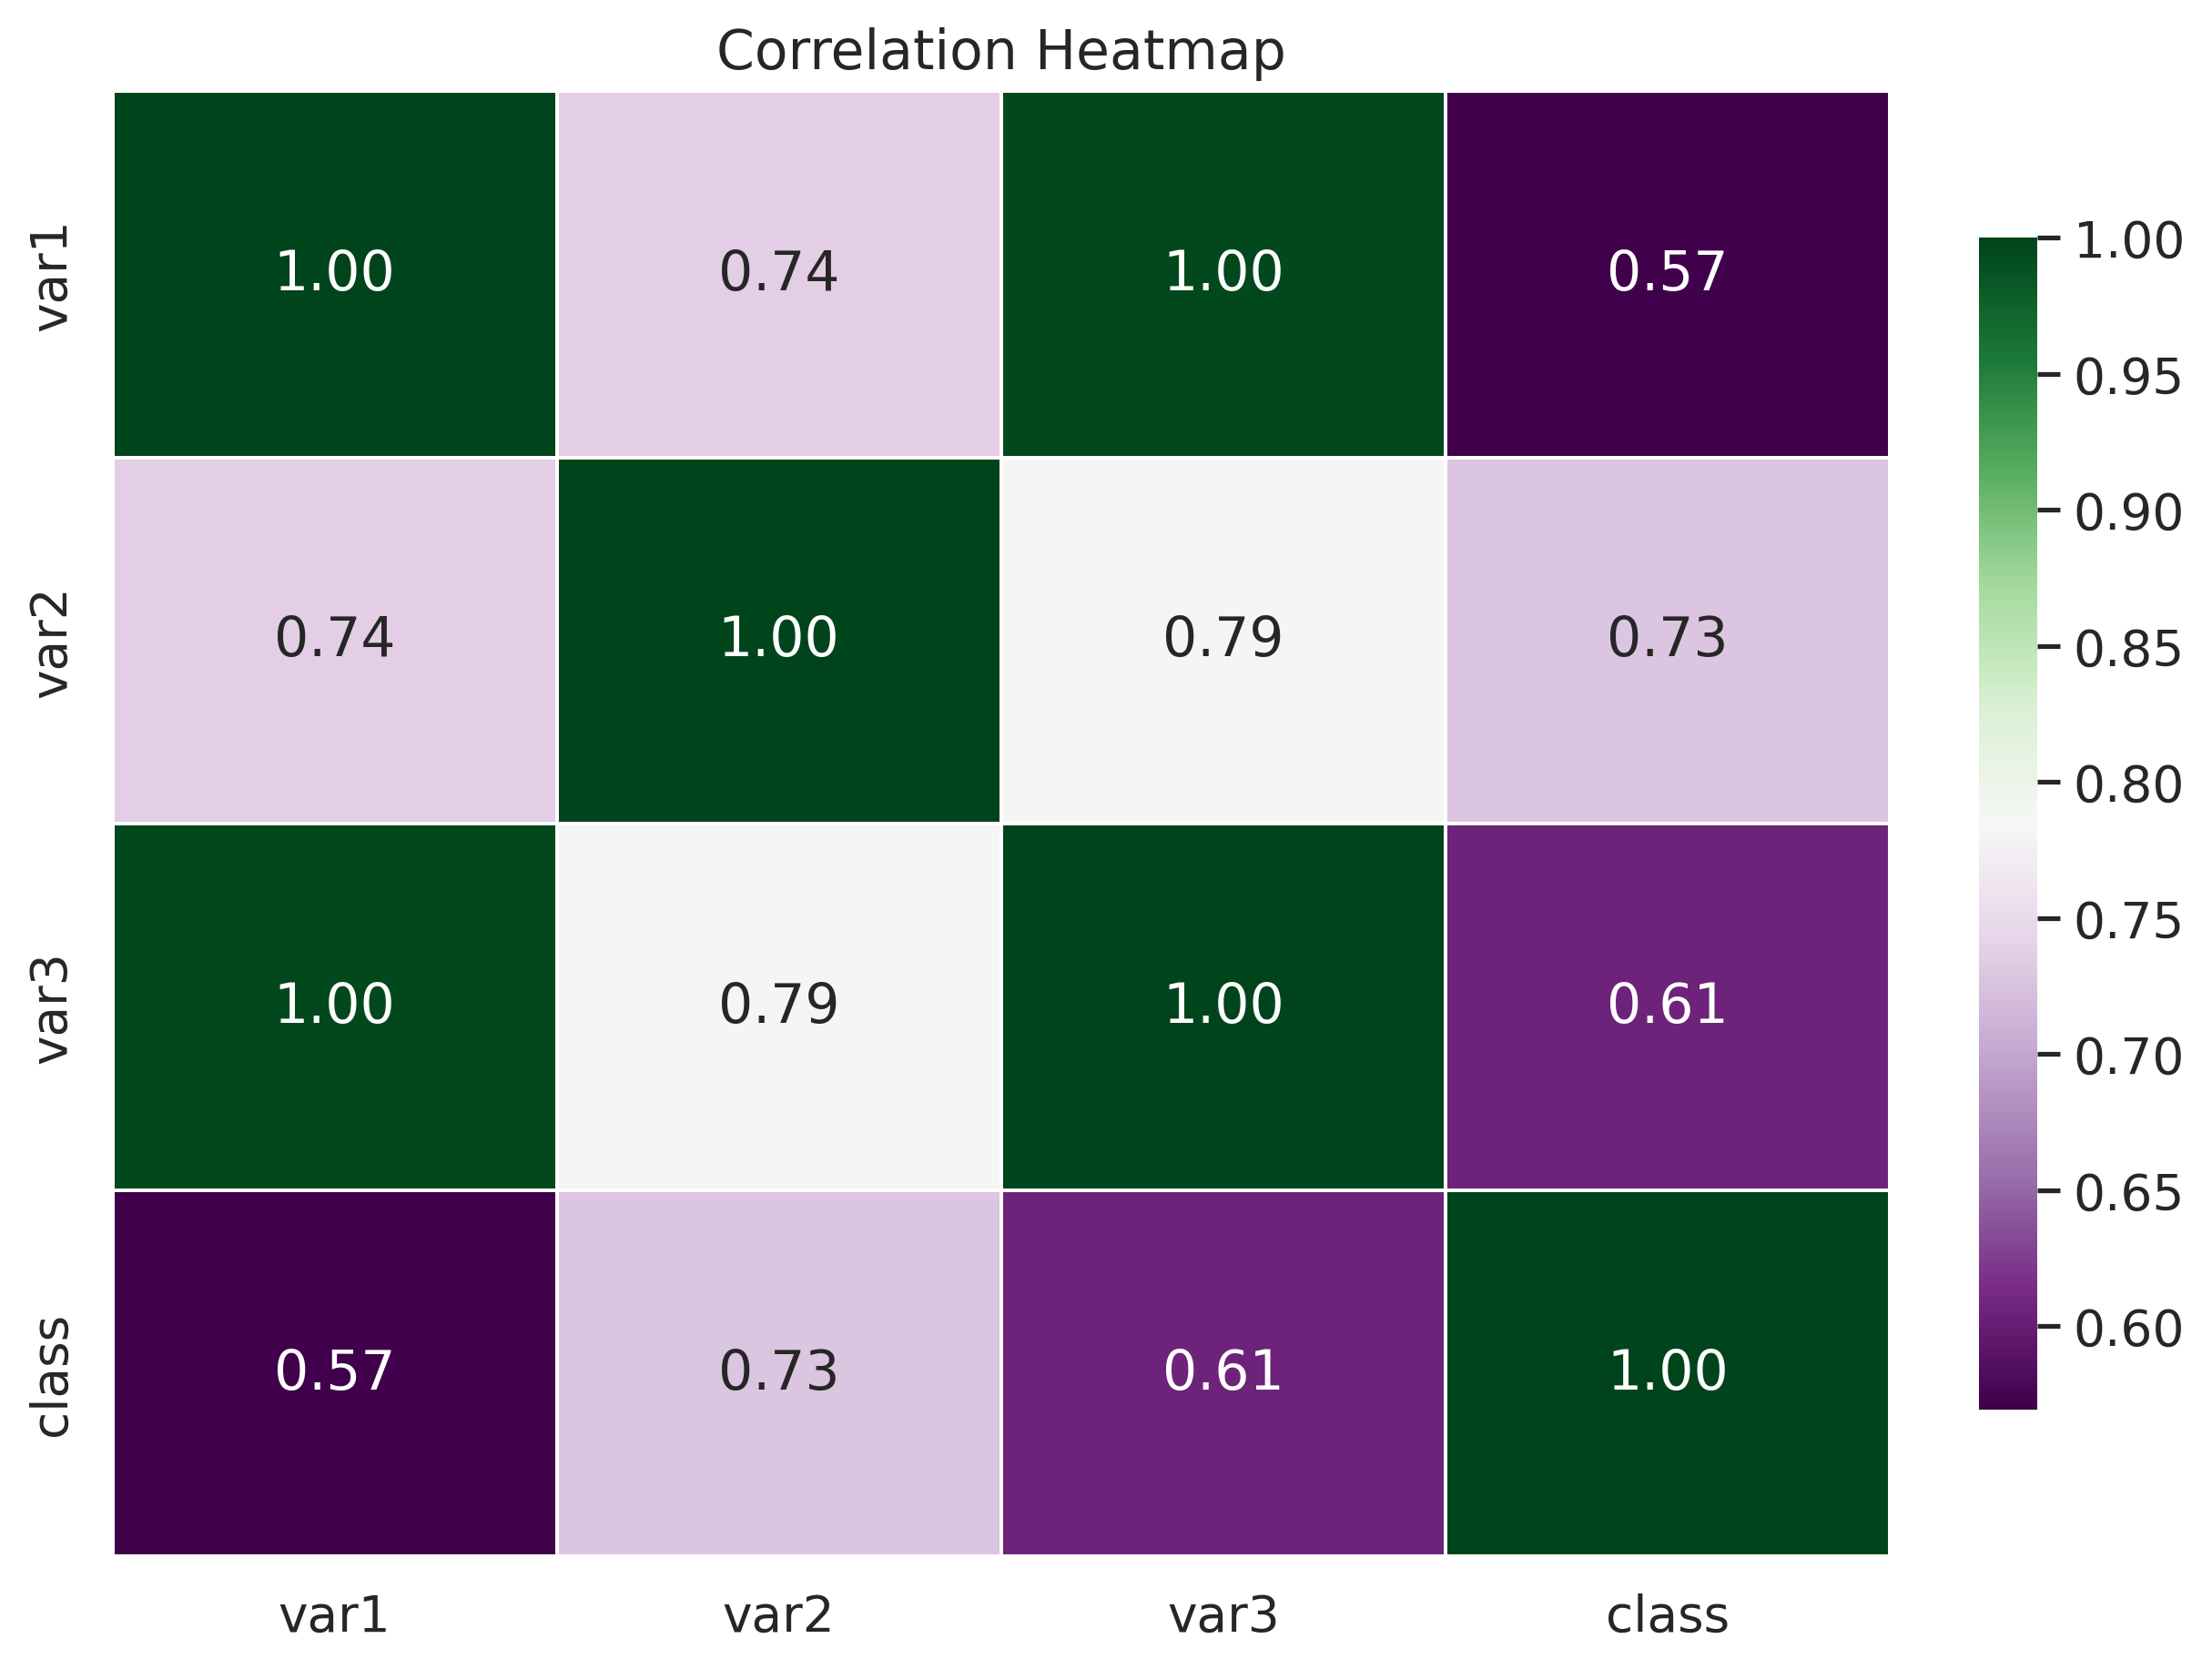

In [95]:
def plot_correlation_heatmap(df: pd.DataFrame):
    """
    Generates a correlation heatmap for all numeric variables in the dataframe using the 'PRGn' colormap.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
    """
    plt.figure(figsize=(8, 6), constrained_layout=True)
    
    # Compute correlation matrix (including all numeric columns)
    corr_matrix = df.corr()
    
    # Plot the heatmap with the 'PRGn' colormap
    sns.heatmap(corr_matrix, annot=True, cmap='PRGn', fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8})
    plt.title('Correlation Heatmap')
    plt.show()

# Plot the correlation heatmap using all numeric columns
plot_correlation_heatmap(df)


### Conclusion

In this analysis, we employed a variety of visualizations to gain a comprehensive understanding of the dataset. Each plot was designed to highlight different aspects of the data:

- **Univariate Analysis (Histograms and Boxplots):**  
  These plots allow us to examine the distribution of individual variables (`var1`, `var2`, `var3`). Histograms with KDE curves provide a view of the overall shape and spread of the data, while boxplots help identify outliers and compare central tendencies.

- **Bivariate Analysis (Scatter Plots with Regression Lines):**  
  By plotting pairs of variables, we can visually assess potential correlations and linear relationships. Regression lines overlayed on scatter plots help clarify trends and indicate the strength of these relationships.

- **Class Distribution:**  
  A count plot of the `class` variable shows how the data is divided among the different classes. This is essential for understanding the balance of the dataset, which has implications for any predictive modeling or classification tasks.

- **Class Comparison (Boxplots by Class):**  
  Boxplots grouped by class reveal how each continuous variable behaves across different classes. This can uncover discriminative features that differentiate the classes.

- **Pairwise Relationships (Pairplot):**  
  A pairplot provides an overall visual summary of how every variable interacts with each other. It combines both univariate distributions and bivariate scatter plots, offering a holistic view of the data structure.

- **Correlation Heatmap:**  
  The heatmap quantitatively summarizes the linear relationships between all numeric variables using a diverging color palette (in this case, "PRGn"). This plot makes it easy to spot strong correlations or potential multicollinearity, which is valuable for further statistical analysis or modeling.

Together, these visualizations not only reveal the underlying patterns and relationships in the data but also serve as a strong foundation for more advanced analyses, such as clustering, classification, or dimensionality reduction. They help ensure that any subsequent modeling efforts are based on a thorough understanding of the data.
